In [1]:
%matplotlib inline

import os
import sys

PACKAGE_PARENT = '..'
sys.path.append(PACKAGE_PARENT)

import json
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

from gaminet import GAMINetClassifier
from gaminet import GAMINetRegressor
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization

In [2]:
from dataset import *
random_state = 0
train_x, test_x, train_y, test_y, task_type, meta_info = get_credit_default(random_state)

In [3]:
def metric_wrapper(metric, scaler):
    def wrapper(label, pred):
        return metric(label, pred, scaler=scaler)
    return wrapper

def auc(label, pred, scaler=None):
    return roc_auc_score(label, pred)

get_metric = metric_wrapper(auc, None)

In [4]:
meta_info.keys()

dict_keys(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT456', 'FLAG_UTIL_RAT1', 'UTIL_RAT1', 'UTIL_RAT_AVG', 'UTIL_RAT_RANGE', 'UTIL_RAT_MAX', 'FLAG_PAY_RAT1', 'PAY_RAT1', 'PAY_RAT_AVG', 'PAY_RAT_RANGE', 'PAY_RAT_MAX', 'Default Payment'])

In [5]:
model = GAMINetClassifier(interact_num=10,
                          subnet_size_main_effect=[20] * 1,
                          subnet_size_interaction=[20] * 2, 
                          max_epochs=[1000, 1000, 1000],
                          learning_rates=[0.001, 0.001, 0.0001],
                          early_stop_thres=["auto", "auto", "auto"],
                          batch_size=1000,
                          warm_start=True,
                          reg_clarity=0.1,
                          reg_mono=0.1,
                          verbose=True,
                          random_state=random_state)
model.fit(train_x, train_y)

####################Stage 1: Main Effect Training####################
###############Run Warm Initialization for Main Effect###############


Epoch:    1, train loss: 0.45365, validation loss: 0.44343: 100%|██████████| 20/20 [00:00<00:00, 38.15it/s]            
Epoch:    2, train loss: 0.44176, validation loss: 0.44076: 100%|██████████| 20/20 [00:00<00:00, 106.17it/s]           
Epoch:    3, train loss: 0.44007, validation loss: 0.44081: 100%|██████████| 20/20 [00:00<00:00, 101.35it/s]           
Epoch:    4, train loss: 0.43868, validation loss: 0.44168: 100%|██████████| 20/20 [00:00<00:00, 110.87it/s]           
Epoch:    5, train loss: 0.43841, validation loss: 0.43896: 100%|██████████| 20/20 [00:00<00:00, 104.52it/s]           
Epoch:    6, train loss: 0.43795, validation loss: 0.43863: 100%|██████████| 20/20 [00:00<00:00, 103.97it/s]           
Epoch:    7, train loss: 0.43802, validation loss: 0.43844: 100%|██████████| 20/20 [00:00<00:00, 106.74it/s]           
Epoch:    8, train loss: 0.43717, validation loss: 0.43744: 100%|██████████| 20/20 [00:00<00:00, 107.31it/s]           
Epoch:    9, train loss: 0.43699, valida

Main Effect Training Stop at Epoch: 23, train loss: 0.43558, validation loss: 0.43928
####################Stage 2: Interaction Training####################
###############Run Warm Initialization for Interaction###############


Epoch:    1, train loss: 0.44621, validation loss: 0.44799: 100%|██████████| 20/20 [00:00<00:00, 40.21it/s]            
Epoch:    2, train loss: 0.44389, validation loss: 0.44847: 100%|██████████| 20/20 [00:00<00:00, 41.89it/s]            
Epoch:    3, train loss: 0.44094, validation loss: 0.44386: 100%|██████████| 20/20 [00:00<00:00, 42.79it/s]            
Epoch:    4, train loss: 0.43730, validation loss: 0.44035: 100%|██████████| 20/20 [00:00<00:00, 40.21it/s]            
Epoch:    5, train loss: 0.43630, validation loss: 0.43945: 100%|██████████| 20/20 [00:00<00:00, 41.89it/s]            
Epoch:    6, train loss: 0.43689, validation loss: 0.43912: 100%|██████████| 20/20 [00:00<00:00, 42.42it/s]            
Epoch:    7, train loss: 0.43487, validation loss: 0.43766: 100%|██████████| 20/20 [00:00<00:00, 41.38it/s]            
Epoch:    8, train loss: 0.43434, validation loss: 0.43695: 100%|██████████| 20/20 [00:00<00:00, 44.69it/s]            
Epoch:    9, train loss: 0.43337, valida

Interaction Training Stop at Epoch: 54, train loss: 0.42974, validation loss: 0.43413
#########################Stage 3: Fine Tuning#########################


Epoch:    1, train loss: 0.42966, validation loss: 0.43457: 100%|██████████| 20/20 [00:00<00:00, 42.34it/s]            
Epoch:    2, train loss: 0.42918, validation loss: 0.43450: 100%|██████████| 20/20 [00:00<00:00, 40.62it/s]            
Epoch:    3, train loss: 0.42924, validation loss: 0.43486: 100%|██████████| 20/20 [00:00<00:00, 40.62it/s]            
Epoch:    4, train loss: 0.42937, validation loss: 0.43449: 100%|██████████| 20/20 [00:00<00:00, 41.04it/s]            
Epoch:    5, train loss: 0.42934, validation loss: 0.43452: 100%|██████████| 20/20 [00:00<00:00, 41.29it/s]            
Epoch:    6, train loss: 0.42918, validation loss: 0.43478: 100%|██████████| 20/20 [00:00<00:00, 39.97it/s]            
Epoch:    7, train loss: 0.42924, validation loss: 0.43435: 100%|██████████| 20/20 [00:00<00:00, 41.04it/s]            
Epoch:    8, train loss: 0.42914, validation loss: 0.43449: 100%|██████████| 20/20 [00:00<00:00, 34.72it/s]            
Epoch:    9, train loss: 0.42933, valida

Fine Tuning Stop at Epoch: 16, train loss: 0.42919, validation loss: 0.43445


In [6]:
model.time_cost

{'warm_start_main_effect': 11.64,
 'fit_main_effect': 4.74,
 'prune_main_effect': 0.25,
 'get_interaction_list': 0.7,
 'add_interaction': 0.78,
 'warm_start_interaction': 4.26,
 'fit_interaction': 25.81,
 'prune_interaction': 0.23,
 'fine_tune_all': 8.14}

In [7]:
pred_train = model.predict_proba(train_x)[:, 1]
pred_test = model.predict_proba(test_x)[:, 1]
gaminet_stat = np.hstack([np.round(get_metric(train_y, pred_train.ravel()),5),
                          np.round(get_metric(test_y, pred_test.ravel()),5)])
print(gaminet_stat)

[0.7824  0.78147]


In [8]:
gaminet_stat = np.hstack([np.round(np.mean(train_y.ravel() == (pred_train > 0.5).ravel()),5),
                          np.round(np.mean(test_y.ravel() == (pred_test > 0.5).ravel()),5)])
print(gaminet_stat)

[0.81929 0.82767]


In [9]:
model.certify_mono()

True

In [10]:
for i in model.mono_increasing_list + model.mono_decreasing_list:
    model.partial_derivatives(i)

Global Interpretation

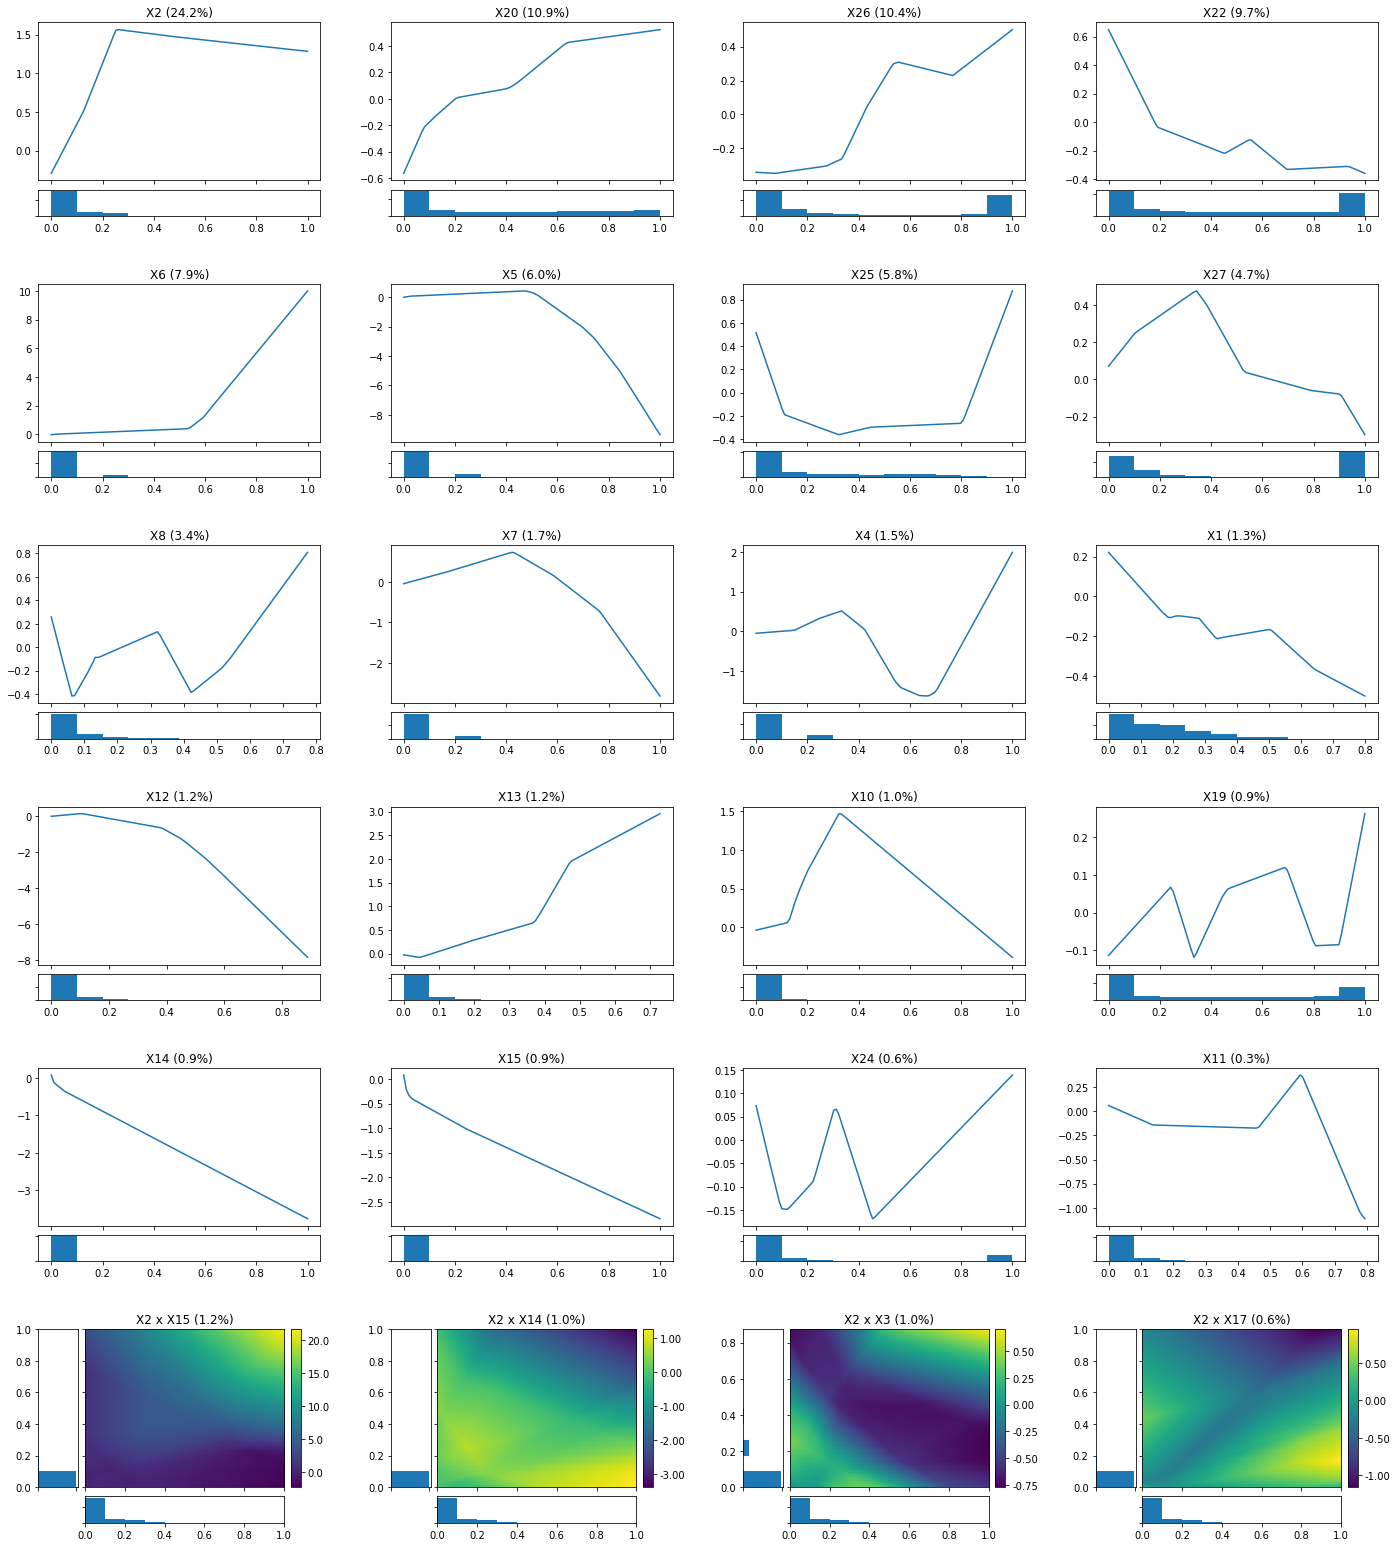

In [11]:
data_dict_global = model.global_explain(save_dict=False)
global_visualize_density(data_dict_global, main_effect_num=40, interaction_num=4, cols_per_row=4)

Feature Importance

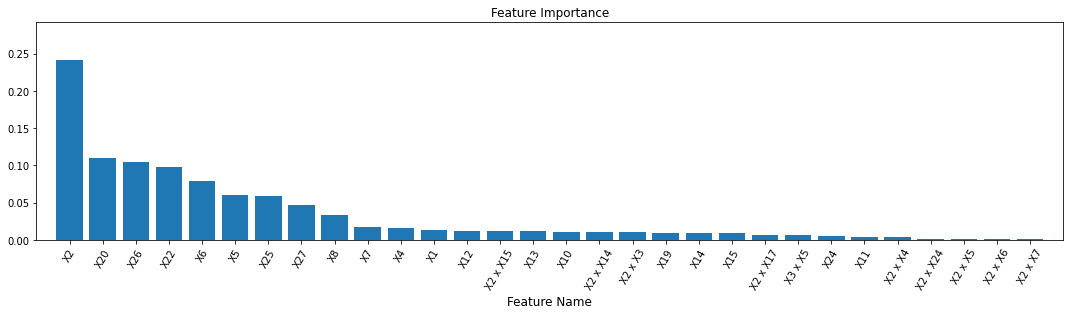

In [12]:
data_dict_global = model.global_explain(save_dict=False)
feature_importance_visualize(data_dict_global)